# Round 1 - Components of Machine Learning

<img src="../../../coursedata/R1_ComponentsML/AMLProblem.png" alt="Drawing" style="width: 600px;"/>

Many machine learning (ML) problems and methods consist of three components: 

1. Data points as the basic (atomic) unit of information. Data points are characterized by features, which are  properties that can be measured (or computed) easily. Besides features, data points are often associated with certain labels that represent some higher-level information or quantity of interest. In contrast to features, labels are difficult to acquire and much of machine learning is about to develop methods that allow to estimate or predict the labels of a data point based on its features.  

2. A hypothesis space (also referred to as a ML model) consisting of computationally feasible predictor functions.

3. A loss function that is used to assess the quality of a particular predictor function. 

## Learning Goals

* Learn to make useful definitions for what data points (examples, samples), features and labels are in different real-life applications. 
* Learn how to represent data as numpy arrays which are, in turn, the Python implemenation of vectors and matrices.   
* Learn to use ("toy") datasets provided by the Python library `scikit-learn`. 
* Learn about the concept of hypothesis spaces. 
* Learn how to fit (linear) predictions functions to data. 

This notebook contains several student tasks which require you to write a few lines of Python code to solve small problems. In particular, you have to fill in the gaps marked as **Student Task**.

<b><center><font size=4>Additional material</font></center></b>

<b><font size=4>Videos</font></b>

* [Data](https://youtu.be/WWYRH3x7_5M), [Hypothesis Space](https://youtu.be/CDcRfak1Mh4), [Hypothesis Space of Linear Models](https://youtu.be/Mch5hmhVuiA), [Hypothesis Space of Decision Trees](https://youtu.be/0FmaLfjAaRE), [Hypothesis Space of Deep Learning](https://youtu.be/im8mweIrpAM),[Loss Functions](https://www.youtube.com/watch?v=Uv9lihDfsBs&t=4s)

<b><font size=4>Tutorials</font></b>

* components of ML can be found under [this link](https://arxiv.org/pdf/1910.12387.pdf) 

* Python library `numpy` can be found under [this link](https://hackernoon.com/introduction-to-numpy-1-an-absolute-beginners-guide-to-machine-learning-and-data-science-5d87f13f0d51).

* "Learn the Basics" and "Data Science Tutorial" sections from [this link](https://www.learnpython.org/en/).

* a quick refresher for basic properties of matrices can be found under [this link](http://math.mit.edu/~gs/linearalgebra/linearalgebra5_1-3.pdf)
and [this link](https://onlinelibrary.wiley.com/doi/pdf/10.1002/9780470549094.app1)

* mathematical notation [this link](https://en.wikipedia.org/wiki/List_of_mathematical_symbols)



## Data as Matrices and Vectors
<a id="Q1"></a>

To implement ML methods, we need to be able to efficiently **store and manipulate** data.  A quite powerful tool to represent and manipulate data are [vectors and matrices](https://en.wikipedia.org/wiki/Matrix_(mathematics)) which are, in turn, special cases of [tensors](https://en.wikipedia.org/wiki/Tensor). 

The data points arising in many application domains can often be characterized by a list of numeric attributes. This numeric attributes or "features", $x_{r}$ can be stacked conveniently into a vector $\mathbf{x}=\big(x_{1},\ldots,x_{n}\big)^{T}$. Many ML methods, such as linear regression (see round 2) or logistic regression (see round 3), use predictor functions of the form $h(\mathbf{x}) = \mathbf{w}^{T} \mathbf{x}$ with some weight vector $\mathbf{w}$. 

Once we restrict ourselves to linear functions of the form $h(\mathbf{x}) = \mathbf{w}^{T} \mathbf{x}$, we can represent a predictor function by the weight vector $\mathbf{w}$. Indeed, given the weight vector $\mathbf{w}$, we can evaluate the predictor function for any feature vector $\mathbf{x}$ as $h(\mathbf{x}) = \mathbf{w}^{T} \mathbf{x}$. Thus, not noly we can represent data using a vector, but also the predictor functions applied to this data. 

Assume we have a set of data points which we index with $i=1,...,m$. The $i$th data point is characterized by the feature vector $\mathbf{x}^{(i)} = \big( x_{1}^{(i)}, \ldots, x^{(i)}_{n} \big)^{T}$ 
Accepted way to organize the data in ML is following: features are stored in the ("feature") matrix **X** with each row containing the data for each data point ($m$ - number of data points) and with each column storing the data of each feature vector ($n$ - number of features):

\begin{equation}
\mathbf{X}  = \begin{pmatrix} X_{1,1} & X_{1,2}& \ldots & X_{1,n} \\ 
X_{2,1} & X_{2,2}& \ldots & X_{2,n} \\ 
\vdots & \vdots & \vdots & \vdots \\ 
X_{m,1} & X_{m,2} & \ldots & X_{m,n} \end{pmatrix}\in \mathbb{R}^{m \times n}   \quad \quad (Eq.1)
\end{equation} 
\
The matrix $\mathbf{X} \in \mathbb{R}^{m \times n}$ is stored in Python as a numpy array of shape (m,n). The $i$th row of the matrix $\mathbf{X}$ is the feature vector $\mathbf{x}^{(i)}$ of the $i$th data point. 

Labels of data points are stored in vector **y**: 

\begin{equation}
\mathbf{y}  = \begin{pmatrix} y_{1} \\ y_{2} \\ \vdots \\ y_{m} \end{pmatrix}\in \mathbb{R}^{m}
\end{equation} 
\
**y** vector is represented as a numpy array of shape (m,1)
\
\
\
$m$ - number of data points\
$n$ - number of features\
$\mathbf{X}$       - upper-case bold letters denote a matrix  \
$\mathbf{x}$       - lower-case bold letters denote a vector  \
$\mathbf{x}^{T}$   - transpose of vector x \
$x_{1}$            - first entry of vector x\
$x_{r}$            - $r$th entry of vector x\
$\mathbf{x}^{(i)}$ - feature vector of $i$th data point\
$x_{r}^{(i)}$      - $r$th feature of $i$th data point\
$\mathbb{R}$       - real numbers\
$\mathbb{R}^{n}$   - [real coordinate space](https://en.wikipedia.org/wiki/Real_coordinate_space) consisting of length-$n$ lists of real numbers \
$\mathbb{R}^{m \times n}$ - matrices with $m$ rows and $n$ columns of real-valued numbers$


## Features and Labels 

Let us illustrate the main ML terminology using a concrete example. Imagine that we want to build a model for classifying songs according to their genre (such as "Pop", "Blues" or "Hip-Hop"). In this case the **data points** will be songs, one particular song correspond to one particular data point. To build a classifier for the song genre, we need some labeled data points, i.e., songs for which we know the correct genre. Each data point has several   **features**, which characterize the songs. Features include e.g., the city where the song was produced, the length of the song's lyrics, its tempo or even the power spectrum of audio signal. The quantity of interest or **label** in this case is the genre to which the song belongs to. 

<img src="../../../coursedata/R1_ComponentsML/FeaturesLabels.jpg" alt="Drawing" style="width: 1000px;"/>


<a id='Bonus1'></a>
<div class=" alert alert-warning">
    <b>Bonus Task.</b> Machine Learning in your life. 
    
Bonus task worth of 50 points.
    
Produces a short video/slides/description where some real-life situation is modelled as a machine learning problem. 
</div>

## Scikit-Learn Data

The Python library `scikit-learn` comes with a few standard datasets, for instance the [iris](https://scikit-learn.org/stable/datasets/index.html#iris-plants-dataset) and [digits](https://scikit-learn.org/stable/datasets/index.html#optical-recognition-of-handwritten-digits-dataset) datasets for classification and the [boston house prices](https://scikit-learn.org/stable/datasets/index.html#boston-house-prices-dataset) and [linnerrud](https://scikit-learn.org/stable/datasets/index.html#linnerrud-dataset) datasets for regression.
These are [Toy datasets](https://scikit-learn.org/stable/datasets/index.html#toy-datasets) - small datasets that do not require to download any file from some external websites. However, `sciki-learn` also provides significantly larger datasets that are referred to as [Real world datasets](https://scikit-learn.org/stable/datasets/index.html#real-world-datasets) which can be accessed online. 

Find more information about `scikit-learn` datasets here: https://scikit-learn.org/stable/datasets/index.html

More datasets can be found here:
https://archive.ics.uci.edu/ml/index.php
https://www.kaggle.com/datasets

Let us now take a closer look on some of these `scikit-learn` datasets and try to identify features and labels for these datasets.

### Toy datasets

The code snippet below shows how to download datasets from `sklearn` and how to access features and labels of the data points in these datasets. Small toy datasets are imported using command `from sklearn import datasets`. 

These datasets are stored using the [`bunch` data type](https://pypi.org/project/bunch/), which is similar to the `dictionary` data type. A `bunch` object containes key-value pairs. Most datasets contain at least the keys `'data', 'target', 'target_names','DESCR'`. The value of the key `DESCR` is a short description of the dataset. The value of the `'target_names'` and `'target'` keys are the labels' names and labels, respectively, for each data point. 
By default, the labels of data points are always numbers. 

In a classification problem, these numbers are integers starting from $0$. The values of the key ``target_names`` provide a textual description of the meaning of different label values. E.g., the labels of images could be $y=0$ or $y=1$ and the label names would be 0="Cat", 1="Dog". 
The value of the `'data'`key is the feature matrix (see <a href='#Q1'>(Eq.1)</a>). 


<b><center><font size=3>Explore the dataset</font></center></b>
The 
**["Digits" dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits)** contains images of hand-written digits. This dataset can be used for testing a classification method to [recognize digits from hand-written images](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#recognizing-hand-written-digits).



In [1]:
# import toy datasets from sklearn library
from sklearn import datasets 

# load the digits dataset into the bunch object "digits"
digits = datasets.load_digits() 
# print the keys of all (key,value) pairs contained in digits
digits.keys() 

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [2]:
print(digits.DESCR[:660]) # print out a short description of the dataset (only first 660 characters are used)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.



We can see from the description of the dataset that the **data points** are characterized by 8x8 pixel images of hand-written digits. Each pixel of an image is represented by an integer $0,\ldots,16$ with $0$ meaning black pixel and $16$ meaning white pixel. 

Thus, each data point is characterized by 64 **features**, which are the integer values of the 64 pixels. Moreover, each data point is assigned a **label**, being an integer $0,\ldots,9$, according to the digit which is shown in the image.

In [3]:
# print number of datapoints
print("Number of datapoints: {}".format(digits.data.shape[0]))

# print the number of features used to characterize a single data point
print("\nNumber of features used to characterize a data point: {}".format(digits.data.shape[1]))

# print number of different classes (number of different values the label can take on) 
print("\nNumber of different classes (different values the label can take on): {}".format(digits.target_names))

# print number of datapoints with known label
print("\nNumber of labeled data point: {}".format(digits.target.shape[0]))

Number of datapoints: 1797

Number of features used to characterize a data point: 64

Number of different classes (different values the label can take on): [0 1 2 3 4 5 6 7 8 9]

Number of labeled data point: 1797


In [4]:
# digits.images returns an np.array of shape(m,8,8), which represent
# m different images each having 8x8 pixels with grayscale value in the range 0..16.

print("shape of digits.images : ",digits.images.shape)
print("first image : ", digits.images[0,:,:])


# digits.data reutrns an np.array of shape (m,6), which represent
# m different images each represented by 64 numbers that are the 
# grayscale values of the image pixels 

print("shape of digits.data : ",digits.data.shape)
print("data : ", digits.data)

# note that the two different numpy arries digits.images and digits.data contain 
# exactly the same information but in a slightly different form 


shape of digits.images :  (1797, 8, 8)
first image :  [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
shape of digits.data :  (1797, 64)
data :  [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


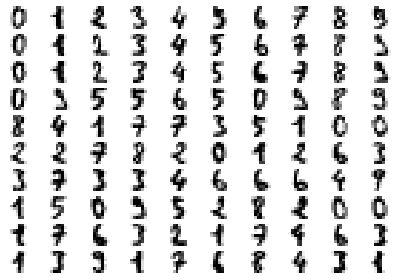

In [5]:
import matplotlib.pyplot as plt # import matplotlib library for plotting

# plot the 8x8 images of the first 100 data points 
# each data point represents a handwritten digit

fig, axes = plt.subplots(10, 10)    # create an array of subplots, 10 rows and 10 columns
axes_flat = axes.flatten()          # collaps 10 x 10 array into a 1-dimensional array of 100 elements 
for i, ax in enumerate(axes_flat):  # iterate over array of subplots 
    ax.imshow(digits.images[i], cmap='gray_r')  # for i-th subplot, show the image of the i-th handwritten digit  
    
plt.setp(axes_flat, xticks=[], yticks=[], frame_on=False) # remove ticks and frame in all subplots
plt.tight_layout(h_pad=0.5, w_pad=0.01)  # reduce whitspaces between plots
plt.show()

<b><center><font size=3>Features vs Labels</font></center></b>

The **["Linnerud" dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_linnerud.html#sklearn.datasets.load_linnerud)** contains physiological parameters (Weight, Waist and Puls) and exercise data (Chins, Situps and Jumps) for 20 athletes. We can model this as a machine learning problem by considering data points representing athletes.

In the description of the dataset the exercise data is referred to as features while the physiological parameters are considered the labels of datapoints (athletes). However, in practice one can choose what is the quantity of interest (labels). For example, if the quantity of interest is the number of jumps, one can use the physiological parameters (weight, waist and puls) as features to find a predictor for the number of jumps that the athelete is likely to achieve.

In [6]:
# load the linnerud dataset into the bunch object "linnerud"
linnerud = datasets.load_linnerud() 

# print features names
print("\nFeatures: {}".format(linnerud.feature_names))

# print labels names
print("\nLabels: {}".format(linnerud.target_names))


Features: ['Chins', 'Situps', 'Jumps']

Labels: ['Weight', 'Waist', 'Pulse']


### Real-World (Large) Datasets

In addition to small datasets it is possible to fetch larger datasets using the library `scikit-learn`.

**The Labeled Faces in the Wild face recognition** dataset is a collection of JPEG pictures of famous people collected over the internet (read more [here](https://scikit-learn.org/stable/datasets/index.html#the-labeled-faces-in-the-wild-face-recognition-dataset)). 
The dataset can be used to test methods for face verification or [face recognition](https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html#faces-recognition-example-using-eigenfaces-and-svms) classification problems.

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people # load data with sklearn.datasets 

# load the part of dataset with labeled images
# use only persons with at least 20 images in the dataset, resize each picture by 0.4 ratio
lfw_people = fetch_lfw_people(min_faces_per_person=20, resize=0.4) 

# print the keys of all (key,value) pairs in the lfw_people 
print("Dataset contain: {}".format(lfw_people.keys()))

# print number of datapoints
print("\nNumber of datapoints: {}".format(lfw_people.data.shape[0]))

# print the number of features used to charactize a data point
print("\nNumber of features: {}".format(lfw_people.data.shape[1]))

# print label or category names of the first 10 data points 
print("\nLabels: {}".format(lfw_people.target_names[:10]))

Dataset contain: dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

Number of datapoints: 2211

Number of features: 1850

Labels: ['Alejandro Toledo' 'Alvaro Uribe' 'Amelie Mauresmo' 'Andre Agassi'
 'Ariel Sharon' 'Atal Bihari Vajpayee' 'Bill Clinton' 'Colin Powell'
 'Donald Rumsfeld' 'George Robertson']


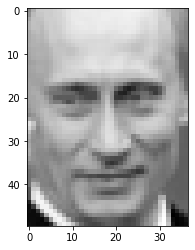

In [9]:
# plot the image from the dataset
plt.imshow(lfw_people.images[42], cmap='gray')
plt.show()

## Visualizing Data

A very useful first step in applying ML methods is to visually inspect the dataset. Let us load and plot the [wine](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn-datasets-load-wine) dataset from `sklearn`. We then visualize this data using some plotting functions provided by the Python libraries `pandas` ([`pd.plotting.scatter_matrix()` function](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html)) and `seaborn` ([`sns.pairplot()` function](https://seaborn.pydata.org/generated/seaborn.pairplot.html)).

In [10]:
# `pandas` is a a fast and easy to use open source library for data analysis and manipulation 
import pandas as pd

# Loading wine dataset from `sklearn` datasets
wine = datasets.load_wine() # loading the wine dataset from sklearn datasets
# print keys of all (key,value) pairs in the bunch oject "wine"
print(wine.keys())

X = wine['data']   # read in the value for the key "data"
y = wine['target'] # read in the value for the key "target"

# print out the shape of the numpy arrays X and y 
print('data:\t\t', X.shape, '\nlabels shape:\t', y.shape) # print number of elements along each dimension of "X" and "Y" 
print('------------------------------------------------') # print some dashes
print(wine['feature_names']) # print the feature names in the dataset, key is a string, value is an array of string

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
data:		 (178, 13) 
labels shape:	 (178,)
------------------------------------------------
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


The code snippet below generates scatterplots using different combinations of features for data points in the wine dataset. 

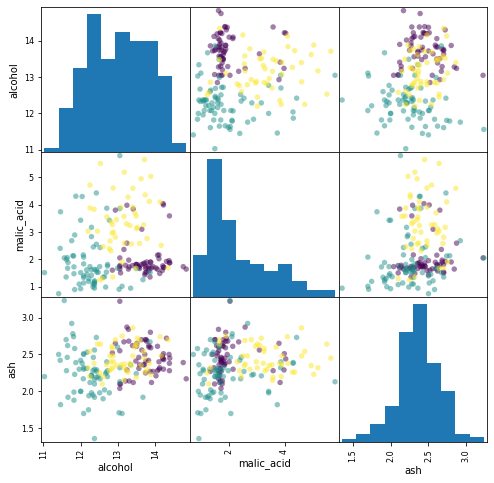

In [11]:
# transform np.array X to pandas dataframe, choose only first 3 features
wine_dataframe =  pd.DataFrame(X[:,:3], columns=wine['feature_names'][:3])

# plot pandas dataframe with histogram and scatter plots
pd.plotting.scatter_matrix(wine_dataframe, c=y, figsize=(8,8), s=120)
plt.show()

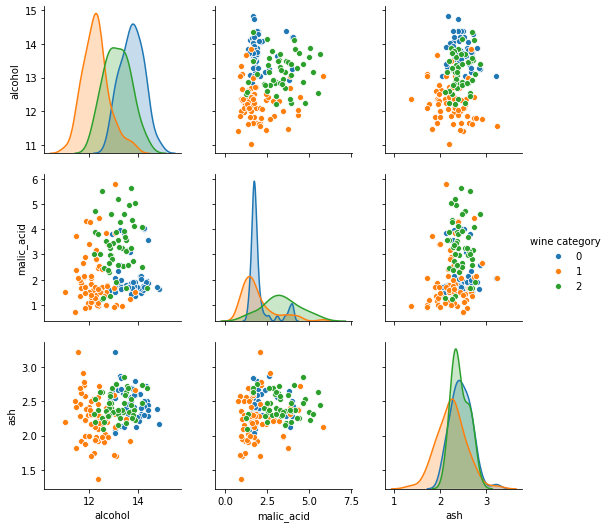

In [12]:
import seaborn as sns # import seaborn library for plotting

# transform np.array X to pandas dataframe, choose only first 3 features
wine_dataframe =  pd.DataFrame(X[:,:3], columns=wine['feature_names'][:3])
wine_dataframe['wine category'] = y

# plot pandas dataframe
# the lines shows the density plot which is essentially a smooth version of the histogram
sns.pairplot(wine_dataframe, hue = 'wine category', vars=wine['feature_names'][:3])

plt.show()

<a id="Q5"></a>

## Learning from Data by Fitting a Model (Curve)

The `Linnerud dataset` consists of data points that represent athletes doing some exercise. We might be interested in how specific properties (or features) of a person affect their performance. Let us try to predict the number of chin-ups that an athlete can do.  

We can formalize this as a machine learning problem. The data points represent athletes who are characterized by the feature $x$ given by the body weight in kg. The quantity of interest (the label) $y$ of a data point is the number of chin-ups the athlete can do. Our goal is to find a predictor function $h(x)$ which takes the bodyweight $x$ as input and outputs a predicted label $\hat{y}$ which estimates the number of chin-ups that the athlete should be able to do. 

Choosing a good predictor $h(x)$ from the space of all possible functions $h(\cdot): \mathbb{R} \rightarrow \mathbb{R}$ is challenging since there are [**so many** of these functions](https://en.wikipedia.org/wiki/Function_of_a_real_variable#Cardinality_of_sets_of_functions_of_a_real_variable). Therefore, we restrict ourselves to the space of linear functions
\begin{equation}
h^{(w)}(x) = w \cdot x. 
\end{equation} 
The set of all of such functions, obtained for different choices for $w$, constitutes the hypothesis space of linear predictors. 
Each function of this **hypothesis space** is characterized by a single number $w \in \mathbb{R}$. Once we specify this number (or weight), we can compute the function value $h^{(w)}(x)$ for any possible feature value $x$. 

<img src="../../../coursedata/R1_ComponentsML/Hspace.jpg" alt="Drawing" style="width: 1000px;"/>

<a id='Bonus2'></a>
<div class=" alert alert-warning">
    <b>Bonus Task.</b> Hypothesis space. 
    
Bonus task worth of 50 points.
    
Prepare a short video that explains the concept of a hypothesis space. The video must not be longer than 10 minutes. 
</div>

<a id='HypothesisDemo'></a>
<div class=" alert alert-info">
    <b>Demo.</b> Hypothesis Space of Linear Predictor Functions.  
    
The code snippet below creates a scatterplot of the `Linnerud` dataset and also plots 
some of the predictor functions from the linear hypothesis space. These predictor functions 
are of the form $h(x) = w \cdot x$ with given weight $w$.

Hint: In this section, we will use the Python library [Scikit-learn (Sklearn)](https://scikit-learn.org/stable/index.html) to fit models to data, specifically we will use [linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn-linear-model-linearregression)

</div>

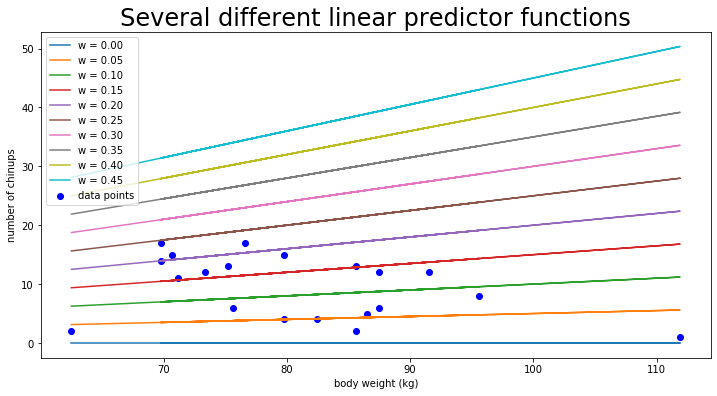

In [13]:
# the library "numpy" provides functions for matrices and vectors
import numpy as np
# import matplotlib library for plotting
import matplotlib.pyplot as plt
# import toy datasets from sklearn library
from sklearn import datasets 
# import module for linear regression 
from sklearn import linear_model 

# load Linnerud dataset into bunch object `linnerud`
linnerud = datasets.load_linnerud()  
# read out the values for the key 'data' and store them in the numpy array ChinUps 
ChinUps = linnerud['data']  
# read out the values for the key 'target' and store them in the numpy array Weight
Weight = linnerud['target']  

# we use the weight (in Lbs) of each athlete as features 
x = Weight.T[0] 
# we use the number of chin ups performed by each athlete as label 
y = ChinUps.T[0] 
x = x.reshape(-1,1)  # convert to numpy array of shape (m,1)
y = y.reshape(-1,1)  # convert to numpy array of shape (m,1)
x = x*0.453 # convert Lbs to Kg

# initialize the linear regression model
reg = linear_model.LinearRegression(fit_intercept=False)
# fit the linear regression model with variables "x" and "y"
# to create the reg.coef_  (weight) attribute 
reg.fit(x,y)

# initialize and empty list
hypothesis_space = [] 
# generate 10 linear predictors
for i in range(10): # loop over range 0-10
    reg.coef_ = np.array([[i*0.05]]) # set new regression coefficient (weight)
    n = reg.predict(x) # make predictions based on the previously defined and fitted regression model
                       # but with new regression coefficient (weight)
    hypothesis_space.append(n) # append the preditions to "hypothesis_space" list

# plot the datapoints and generated predictor functions from the linear hypothesis space
# initialize subplots and get "fig" and "axes" objects
fig, axes = plt.subplots(1, 1, figsize=(12, 6))  

# initialize a scatterplot
axes.scatter(x, y, color='blue',label="data points") 
# plot items from the "hypothesis_space" list
for i in range(len(hypothesis_space)): # loop through the items in "hypothesis_space" list
    y_n = hypothesis_space[i] # plot the ith item from the "hypothesis_space" list
    l = 'w = {:.2f}'.format((i)*0.05) # get a formatted string to use in legend
    axes.plot(x, y_n, label=l) # add the item from "hypothesis_space" to the plot

plt.rc('legend', fontsize=10) # update plot fonts
plt.rc('axes', labelsize=20)  # update plot fonts
plt.rc('xtick', labelsize=20) # update plot fonts
plt.rc('ytick', labelsize=20) # update plot fonts
plt.rc('font', size=20)       # update plot fonts

axes.set_title('Several different linear predictor functions') # set plot title
axes.set_xlabel('body weight (kg)') # set x-axis label
axes.set_ylabel('number of chinups') # set y-axis label
axes.legend(loc='upper left') # set location of the legend to show in upper left corner
plt.show()


### Learning the Best Predictor by Fitting a Model

A key idea underlying ML is to choose predictor functions $h(x)$ based on how well they fit historic or training data. For linear predictors, of the form $h(x)=w \cdot x$, the search of a good predictor reduces to the search for a good choice for the weight $w \in \mathbb{R}$ which is just a number. 

To search for a good predictor function $h$, which maps a feature value $x$ to the predicted label $\hat{y}=h(x)$, we need to measure the loss (or error) incurred when the true label is $y$ but the predicted label is $\hat{y}$. There are many different choices for how to define such a loss function. 

In general, we are free to define the loss function to best suit the application at hand. However, for certain classes of machine learning problems some useful choices for the loss functions have crystalized. For example, if the labels of data points take on numeric values, a widely used choice for the loss function is the squared error loss $(y - \hat{y})^{2}$. 

Using loss functions to measure the quality of a predictor requires the availability of data points for which we know the true label $y$. One option to get labeled data is from historic recordings or experiments. Assume we have some labeled data points $(x^{(1)},y^{(1)}),\ldots,(x^{(m)},y^{(m)})$ consisting of $m$ data points. The $i$th data point has the feature $x^{(i)}$ and the true label $y^{(i)}$. 

We have now all the tools to find the best linear predictor $h(x) = w \cdot x$ by minimizing the empirical risk or average squared error loss 
\begin{equation}
(1/m) \sum_{i=1}^{m} (y^{(i)} - \hat{y}^{(i)})^{2} = (1/m) \sum_{i=1}^{m} (y^{(i)} - w \cdot x^{(i)})^{2}. 
\end{equation}

One might wonder if we could use the prediction error $y - \hat{y}$  itself as a loss function. It can be easily shown that the prediction error (without squaring) is not a good choice as loss function. Indeed, ML methods try find a predictor which minimizes the (average) loss incurred over some labeled data points (training data). Using the prediction error as loss, this minimization problem would result in a trivial predictor $\hat{y}$ which outputs a number as large as possible (limited by the used number format). Indeed, making $\hat{y}$ as large as possible would 
make $y-\hat{y}$ as small as possible. The resulting predictor would completely ignore the training data and therefore will not be useful at all. 

<a id='FitRegressionDemo'></a>
<div class=" alert alert-info">
    <b>Demo.</b> Fitting a Linear Model to Data.  

A linear model corresponds to the set of linear predictor $h(x) = w \cdot x$ with some weight $w\in \mathbb{R}$. Fitting a linear model means to choose the weight to minimize the average prediction error $y-h(x)$ incurred for some labeled data points. The optimal weight $w_{\rm opt}$ can be computed via the function `LinearRegression.fit()` and the corresponding prediction $\hat{y} = w_{\rm opt} x$ for a data point with feature $x$ can be computed using `LinearRegression.predict()`. 

We will plot the data points along with the predictions $\hat{y}^{(i)} = w_{\rm opt} x^{(i)}$ and the prediction errors $y^{(i)} - \hat{y}^{(i)} = y^{(i)} - w_{\rm opt} x^{(i)}$ as red bars. 

</div>

optimal weight w = 0.11143528587026878


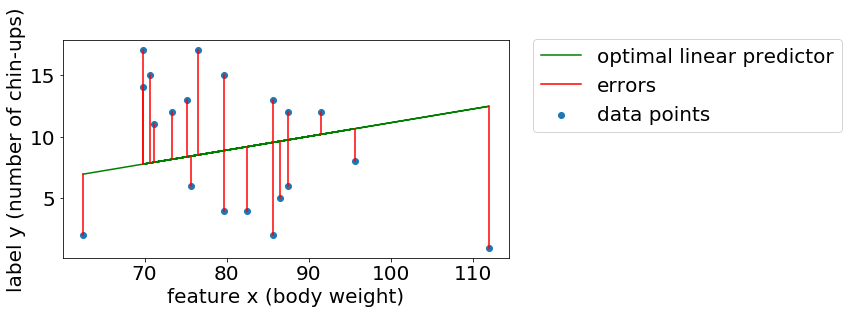

In [40]:
# plot datapoints, linear predictor with optimal weight and prediction errors  
# we will use values of variables `x` (features, weight) and `y` (labels, chin ups) 
# generated in the previous cell 

plt.rc('font', size=20) # set plot font

reg = linear_model.LinearRegression(fit_intercept=False) # initialize Linear Regression model
reg.fit(x, y) # fit the linear regression model using "x" and "y" variables
y_pred = reg.predict(x) # make predictions based on fitted model

# print weight of the optimal predictor 
print("optimal weight w =", reg.coef_[0][0])

# initialize subplots and get "fig" and "axes" objects
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
# initialize a scatterplot with horizontal (vertical) axis representing feature (label) values 
axes.scatter(x, y, label='data points') 
# add the predicted labels "y_pred = h(x)" made by the model to the plot
axes.plot(x, y_pred, color='green', label='optimal linear predictor') 

# indicate error bars

axes.plot((x[0], x[0]), (y[0], y_pred[0]), color='red', label='errors') # add label to legend
for i in range(len(x)-1): # loop through range length of x - 1
    lineXdata = (x[i+1], x[i+1]) # make tuples with same X
    lineYdata = (y[i+1], y_pred[i+1]) # make tuples with different y's
    axes.plot(lineXdata, lineYdata, color='red') # add the red lines to the plot to indicate error distance from our predicted regression model

# add legend to the plot and set position
axes.legend(loc='upper center', bbox_to_anchor=(1.4, 1.05),fontsize=20) 
# set axes labels
axes.set_xlabel("feature x (body weight)")
axes.set_ylabel("label y (number of chin-ups)") 
plt.show()

In [42]:
error = y_pred[0]-y[0]
print(error)

[4.64171524]


### Adding an Intercept Term 

A simple but useful extension of the linear prediction functions used above is to add an intercept term. In particular, we consider predictor functions of the form 
\begin{equation}
h(x) = w \cdot x + b 
\end{equation}
which involves a weight $w$ and a constant offset $b$. The offset $b$ is sometimes referred to as the "intercept term" and geometrically it is value at which the regression line crosses the y-axis. The code snippet below finds (or learns) the best choices for the weight $w$ and intercept $b$ in order to minimize the average squared error incurred for a given set of labeled data points $(x^{(i)},y^{(i)})$. 

In [15]:
# build linear models without (fit_intercept=False) and with intercept (fit_intercept=True)

# initialize Linear Regression model without intercept (fit_intercept=False) 
reg = linear_model.LinearRegression(fit_intercept=False) 
reg.fit(x, y) # fit the linear regression model using "x" and "y" variables
y_pred = reg.predict(x) # make predictions based on fitted model
# find the optimal weight for linear regression model (without intercept)
w_opt = reg.coef_[0][0]

# initialize Linear Regression model with intercept (fit_intercept=True)
reg_intercept = linear_model.LinearRegression(fit_intercept=True) 
reg_intercept.fit(x, y) # fit the linear regression model using "x" and "y" variables
y_pred_intercept = reg_intercept.predict(x) # make predictions based on fitted model
# find the optimal weights for linear regression model (with intercept)
w_opt_intercept = reg_intercept.coef_[0][0]
# find the intercept for linear regression model (with intercept)
intercept = reg_intercept.intercept_[0]

# print parameters of the optimal predictors
print("model without intercept: optimal weight w = {}".format(w_opt))
print("model wit intercept: optimal weight w = {} and intercept = {}".format(w_opt_intercept,intercept))

model without intercept: optimal weight w = 0.11143528587026878
model wit intercept: optimal weight w = -0.18418114215330775 and intercept = 24.351322650827086


Note that the predictor function obtained without intercept term passes through origin, while the predictor function obtained with the intercept term crosses y-axis at the value of the intercept term.

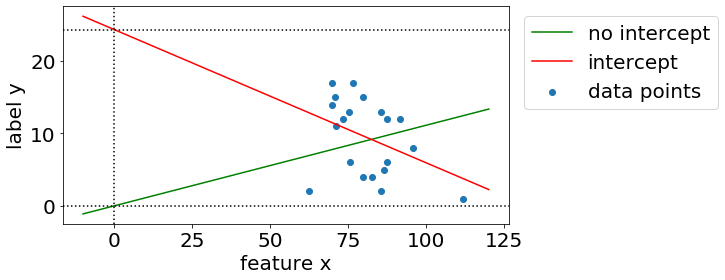

In [16]:
# plot regression dataset
plt.rc('font', size=20) # set plot font

# create a grid of test feature values  
x_grid = np.linspace(-10, 120, num=100).reshape(-1,1) 
# compute predictions from linear regression model without intercept term 
y_pred = reg.predict(x_grid) 
# compute predictions on test feature values using linear regression model with intercept term 
y_pred_intercept = reg_intercept.predict(x_grid)

fig, axes = plt.subplots(1, 1, figsize=(8, 4))
# initialize a scatterplot 
axes.scatter(x, y, label='data points') 
# add the predicted labels "y_pred = h(x)" made by the model to the plot
axes.plot(x_grid, y_pred, color='green', label='no intercept') 
# add the predicted labels "y_pred_intercept = h(x)" made by the model to the plot
axes.plot(x_grid, y_pred_intercept, color='red', label='intercept')

# set axes labels
axes.set_xlabel("feature x") 
axes.set_ylabel("label y")

# add legend to the plot and set position
axes.legend(loc='upper center', bbox_to_anchor=(1.25, 1),fontsize=20) # add a legend to the plot

axes.axvline(0,c='k',ls=':') # add dotted line at x=0 to the plot
axes.axhline(0,c='k',ls=':') # add dotted line at y=0 to the plot
axes.axhline(intercept,c='k',ls=':') # add dotted line at y=intercept to the plot
plt.show()

Note that the optimal weight for the linear predictor without intercept is positive, which suggests a positive correlation between feature value and label value (higher feature value hints at higher label value). In contract, the optimal weight obtained for the linear predictor with an intercept term is negative. This negative weight would suggest a negative correlation between feature value and label value (higher feature value hints at lower label value). 

Since the training error obtained from the linear predictor with intercet term is smaller, it is more plausible to have a negative correlation between feature value and label value. This agrees with the intuition that having a higher body weight typically implies a smaller number of achievable chin-ups. 

<a id='QuestionR1_1'></a>
<div class=" alert alert-warning">
    <b>Student Task.</b> Fitting a Linear Model without and with Intercept. 

Fit a linear regression model to a set of data points $(x^{(1)},y^{(1)}),\ldots,(x^{(m)},y^{(m)})$ which are generated synthetically (using a random generator) and stored in the vectors `syn_x` and `syn_y`. Use the Python class `linear_model.LinearRegression` to represent the set of linear predictor functions. Find optimal weight for linear predictor without intercept `w_opt` and optimal weight and intercept `w_opt_intercept` and `intercept` for linear predictor with intercept. Plot regression dataset.

Use `LinearRegression(fit_intercept=True)` when initializing the Linear regression model with intercept and `LinearRegression(fit_intercept=False)` when iinitializing it without and intercept.
</div>

model without intercept: optimal weight w = 0.5078222136746467
model wit intercept: optimal weight w = 39.19060597876406 and intercept = -388.47209806720974


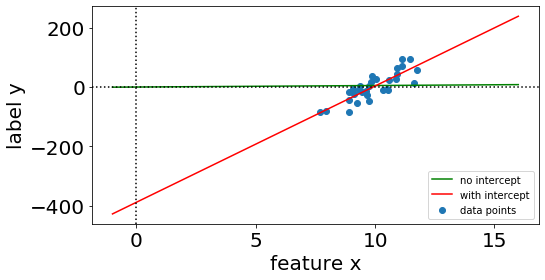

In [36]:
from sklearn import linear_model # import "linear_model" from sklearn
from sklearn.datasets import make_regression # import "make_regression from sklearn.datasets"

# generate data using the imported "make_regression" function
syn_x, syn_y = make_regression(n_samples=30, n_features=1, noise=30, random_state=1) 
syn_x = syn_x + 10*np.ones(30).reshape(syn_x.shape) # add a 10* identity matrix to data

# plot regression dataset
plt.rc('font', size=20) # change plot font

### STUDENT TASK ###
# create Linear Regression model without an intercept
reg = linear_model.LinearRegression(fit_intercept=False)
# fit a linear regression model (without intercept)
reg = reg.fit(syn_x, syn_y)
# find the optimal weight for linear regression model (without intercept)
w_opt = reg.coef_[0]

# create Linear Regression model using an intercept term 
reg_intercept = linear_model.LinearRegression(fit_intercept=True)
# fit a linear regression model (with intercept)
reg_intercept = reg_intercept.fit(syn_x, syn_y)
# find the optimal weights for linear regression model (with intercept)
w_opt_intercept = reg_intercept.coef_[0]
# find the intercept for linear regression model (with intercept)
intercept = reg_intercept.intercept_

# remove the line raise NotImplementedError() before testing your solution and submitting code
# YOUR CODE HERE
# raise NotImplementedError()

# print parameters of the optimal predictor 
print("model without intercept: optimal weight w = {}".format(w_opt))
print("model wit intercept: optimal weight w = {} and intercept = {}".format(
                                w_opt_intercept,intercept))

# create a grid of test feature values  
x_grid = np.linspace(-1, 16, num=100).reshape(-1,1) 
# compute predictions from linear regression model without intercept term 
y_pred = reg.predict(x_grid) 
# compute predictions on test feature values using linear regression model with intercept term 
y_pred_intercept = reg_intercept.predict(x_grid)

fig, axes = plt.subplots(1, 1, figsize=(8, 4)) # initialize subplots and get "fig" and "axes" variables
axes.scatter(syn_x, syn_y, label='data points') # create a scatter plot with the generated synthetic data
axes.plot(x_grid, y_pred, color='green', label='no intercept') # add a line to the plot
axes.plot(x_grid, y_pred_intercept, color='red', label='with intercept') # # add a line to the plot

axes.legend() # add a legend to the plot
axes.set_xlabel("feature x") # add x-axis label to the plot 
axes.set_ylabel("label y") # add y-axis label to the plot
axes.axhline(y=0, color='k',linestyle=':') # add a dotted lien to the plot
axes.axvline(x=0, color='k',linestyle=':') # add a dotted line to the plot
plt.show()

In [37]:
# this cell constains visible tests (sanity checks) and 
# hidden tests which are used for grading student solutions 

assert w_opt < 1, "w_opt value is wrong"
assert w_opt_intercept < 50, "w_opt_intercept value is wrong"
assert intercept > -400, "intercept value is wrong"


print('Sanity check tests passed!')

Sanity check tests passed!


## Take Home Quiz 

Answer the following questions by setting the `answer_R1_Q??` variable for each question to the number of the correct answer. For example, if you think that the second answer in the first quiz question is the right one, then set `answer_R1_Q1=2`. 

<a id='QuestionR1_1'></a>
<div class=" alert alert-warning">
    <b>Student Task.</b> Question R1.1. 

<p> Modify the code in the demo "Fitting a Linear Model to Data" to determine the difference (error) between the predicted value y_pred and the true label y for the first data point (which corresponds to the index 0). Select the correct value (rounded to one decimal) of this error below.</p>

<ol>
  <li>4.6</li>
  <li>-3.8</li>
  <li>5.0</li>
  <li>7.5</li>
</ol> 

</div>

In [43]:
# answer_Q1

# remove the line raise NotImplementedError() before testing your solution and submitting code

answer_R1_Q1  = 1

# YOUR CODE HERE
#raise NotImplementedError()

In [44]:
# this cell is for tests

assert answer_R1_Q1 in [1,2,3,4], '"answer_R1_Q1" Value should be an integer between 1 and 4.'
print('Sanity check tests passed!')


Sanity check tests passed!


<a id='QuestionR1_2'></a>
<div class=" alert alert-warning">
    <b>Student Task.</b> Question R1.2. 

<p>Consider data points having features $\mathbf{x}$ and a numeric label $y$. How can the quality of a predictor function $h(\mathbf{x})$, which delivers a predicted label $\hat{y}=h(\mathbf{x})$ be measured to choose the best predictor function?</p>


<ol>
  <li>Use the difference between our predicted value $\hat{y}$ and true label $y$, i.e: $y - \hat{y}$ and pick the predictor function with the lowest value of loss.</li>
  <li>Use the squared error loss $(y - \hat{y} )^{2}$ and pick the predictor function with the highest value of squared error loss.</li>
  <li>Use the squared error loss $(x - \hat{x})^{2}$ and pick the predictor function with the lowest value of squared error loss.</li>
  <li>Use the squared error loss $(y - \hat{y})^{2}$ and pick the predictor function with the lowest value of the squared error loss.</li>
</ol> 

</div>

In [45]:
# answer_Q2



# remove the line raise NotImplementedError() before testing your solution and submitting code
answer_R1_Q2  = 4

# YOUR CODE HERE
#raise NotImplementedError()

In [46]:
# this cell is for tests

assert answer_R1_Q2 in [1,2,3,4], '"answer_R1_Q2" Value should be an integer between 1 and 4.'
print('Sanity check tests passed!')


Sanity check tests passed!


<a id='QuestionR1_3'></a>
<div class=" alert alert-warning">
    <b>Student Task.</b> Question R1.3. 

<p> Consider a set of $m=3$ data points represented by the feature vectors $\mathbf{x}^{(1)}=\big(1,0,0,0\big)^{T}$, $\mathbf{x}^{(2)}=\big(1,0,1,0\big)^{T}$ and $\mathbf{x}^{(3)}=\big(1,0,-1,0\big)^{T}$. What is $x^{(2)}_{3}$ ? </p>

<ol>
  <li>1 </li>
  <li>0</li>
  <li>-1</li>
</ol> 

</div>

In [47]:
# answer_Q3

answer_R1_Q3  = 3
# remove the line raise NotImplementedError() before testing your solution and submitting code
# YOUR CODE HERE
#raise NotImplementedError()

In [48]:
# this cell is for tests

assert answer_R1_Q3 in [1,2,3], '"answer_R1_Q3" Value should be an integer between 1 and 3.'
print('Sanity check tests passed!')


Sanity check tests passed!
